<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/social_media_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
data=pd.read_csv('sentimentdataset.csv')

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
# Data Cleaning
# Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [6]:
data.head(1)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


In [7]:
# Check for duplicates
data = data.drop_duplicates()

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


<ipython-input-15-05b4ff178af0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='Set2')


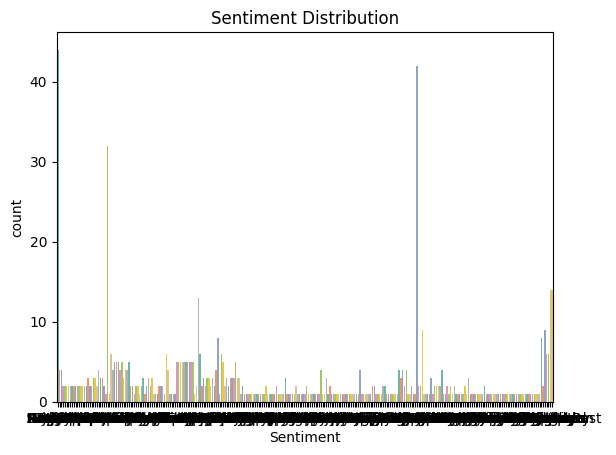

In [15]:
# Exploratory Data Analysis (EDA)
# 1. Sentiment Distribution
sns.countplot(data=data, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

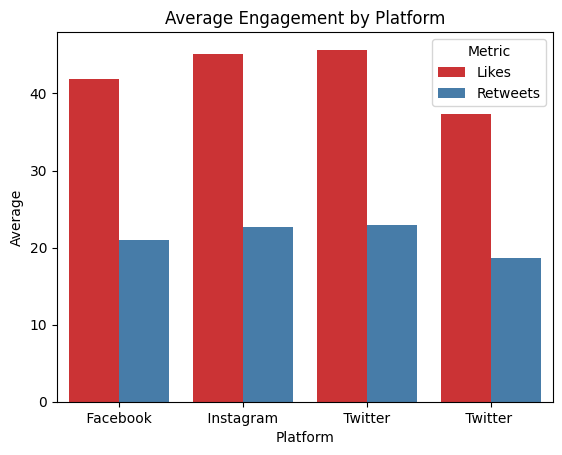

In [16]:
# 2. Engagement Metrics by Platform
platform_engagement = data.groupby('Platform')[['Likes', 'Retweets']].mean().reset_index()
platform_engagement = platform_engagement.melt(id_vars='Platform', var_name='Metric', value_name='Average')
sns.barplot(data=platform_engagement, x='Platform', y='Average', hue='Metric', palette='Set1')
plt.title('Average Engagement by Platform')
plt.show()

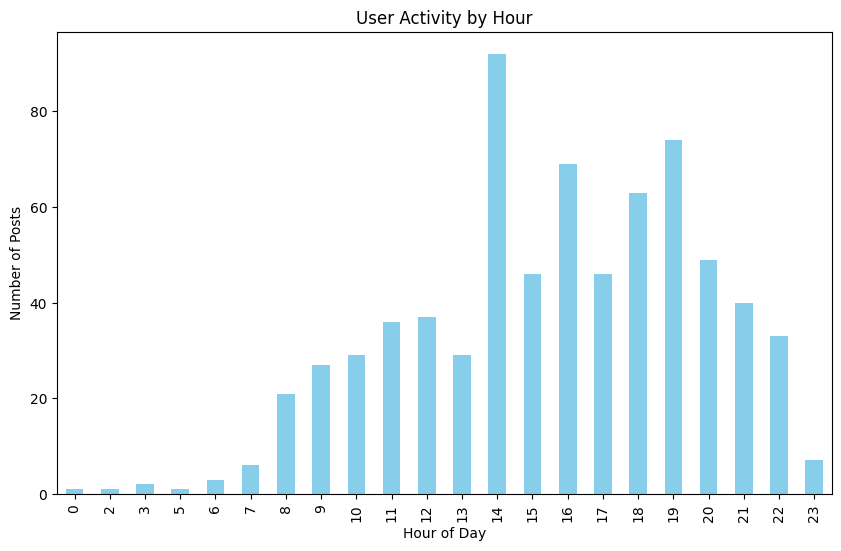

In [17]:
# 3. Posting Activity by Hour
hourly_activity = data.groupby('Hour').size()
hourly_activity.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


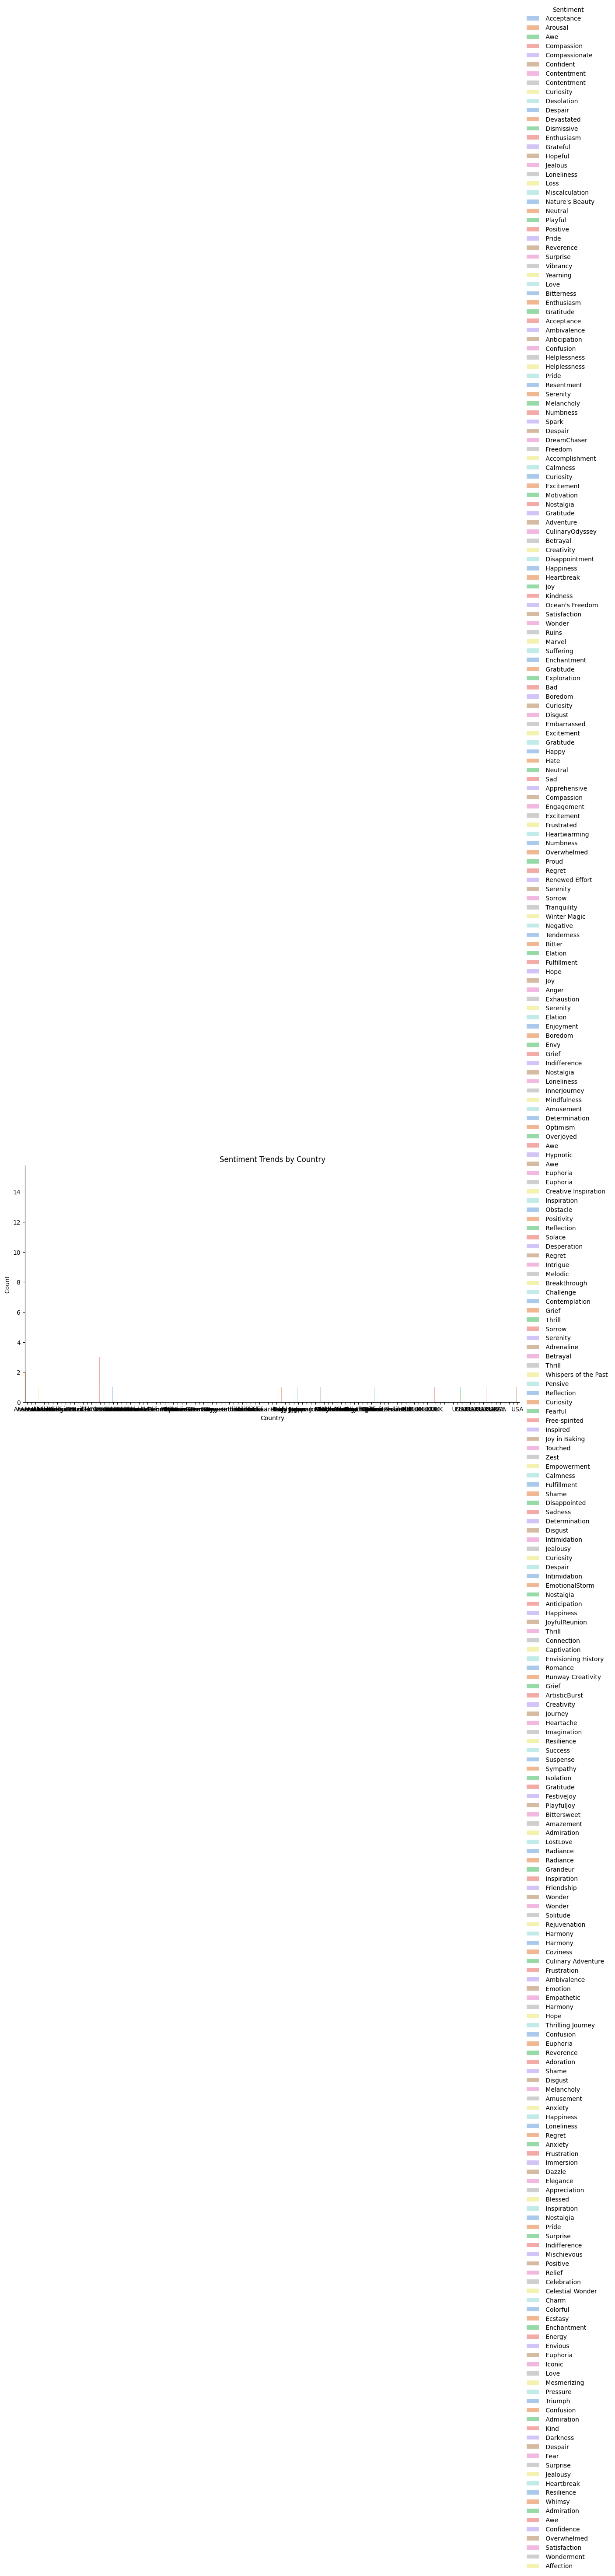

In [18]:
# 4. Trends in Sentiment Across Countries
country_sentiment = data.groupby(['Country', 'Sentiment']).size().reset_index(name='Count')
sns.catplot(data=country_sentiment, x='Country', y='Count', hue='Sentiment', kind='bar', height=6, aspect=2, palette='pastel')
plt.title('Sentiment Trends by Country')
plt.show()

In [19]:
# Clustering Analysis
# Features for clustering
features = data[['Likes', 'Retweets', 'Hour']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
data['KMeans_Cluster'] = kmeans_labels

In [21]:
# Evaluate K-Means
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.33096249077235557


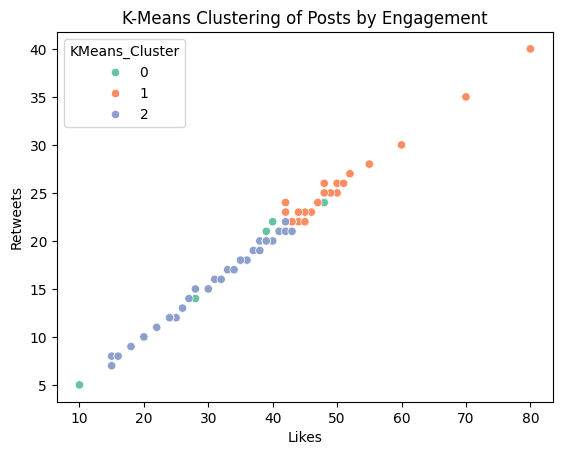

In [22]:
# Visualize K-Means Clusters
sns.scatterplot(data=data, x='Likes', y='Retweets', hue='KMeans_Cluster', palette='Set2')
plt.title('K-Means Clustering of Posts by Engagement')
plt.show()


In [23]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
data['DBSCAN_Cluster'] = dbscan_labels

In [26]:
# Check the number of unique clusters (excluding noise)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters_dbscan > 1:
    # Calculate Silhouette Score if there are at least 2 clusters
    dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(scaled_features[dbscan_labels != -1], dbscan_valid_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    # Output message if clustering was not successful
    dbscan_silhouette = "N/A"
    print("DBSCAN did not form enough clusters for Silhouette Score calculation.")

DBSCAN did not form enough clusters for Silhouette Score calculation.


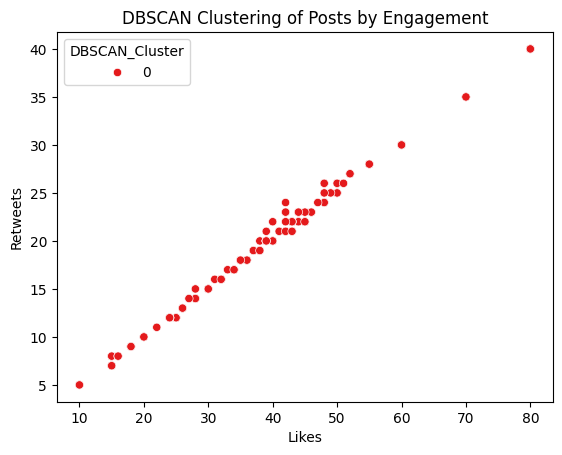

In [27]:
# Visualize DBSCAN Clusters
sns.scatterplot(data=data, x='Likes', y='Retweets', hue='DBSCAN_Cluster', palette='Set1', legend='full')
plt.title('DBSCAN Clustering of Posts by Engagement')
plt.show()


In [30]:
# Output Summary of Clusters
kmeans_summary = data.groupby('KMeans_Cluster')[['Likes', 'Retweets', 'Hour']].mean()
dbscan_summary = data.groupby('DBSCAN_Cluster')[['Likes', 'Retweets', 'Hour']].mean()
print("K-Means Cluster Summary:\n", kmeans_summary)
print('==========================================')
print("DBSCAN Cluster Summary:\n", dbscan_summary)

K-Means Cluster Summary:
                     Likes   Retweets       Hour
KMeans_Cluster                                 
0               37.105263  18.557895  10.847368
1               55.398693  27.748366  17.245098
2               30.509259  15.375000  17.425926
DBSCAN Cluster Summary:
                     Likes   Retweets       Hour
DBSCAN_Cluster                                 
0               42.966292  21.542135  15.592697
